# K-means Clustering and Principal Component Analysis

In this part, we will implement the K-means clustering algorithm and apply it to compress an image. In the second part, we will use principal component analysis to find a low-dimensional representation of face images.

# 1. K-means Clustering

Implementing K-means

Find Closest Centroids

In [43]:
import mat4py as mat
import numpy as np
from matplotlib import pyplot as plt
from __future__ import division
from numpy import linalg

In [3]:
data1 = mat.loadmat("E:\\Machine Learning\\1\\ex7data1.mat")

X = data1["X"]
X_mat = np.mat(X)

In [4]:
X

[[3.38156266663556, 3.389112684892071],
 [4.5278753804032075, 5.854178101169413],
 [2.655681868739463, 4.411994717484785],
 [2.7652346742250753, 3.715413649743292],
 [2.8465601062210943, 4.175506449514385],
 [3.8906719563092116, 6.488380871886209],
 [3.4758052414407934, 3.632848762047064],
 [5.911298445495829, 6.6807685267677925],
 [3.928893967969269, 5.0984466081478255],
 [4.561835366089421, 5.623299290382872],
 [4.574071705525158, 5.3976506891499545],
 [4.371733557330694, 5.461165489180036],
 [4.191693876250999, 4.954693590451864],
 [5.244085176866642, 4.661487668490745],
 [2.8358402028078746, 3.76801716326883],
 [5.635269692588768, 6.3121143831055955],
 [4.686329679649661, 5.6652411030489915],
 [2.8505133748624067, 4.626456272707626],
 [5.110157300375674, 7.3631966235366235],
 [5.182563768446949, 4.646509087781815],
 [5.707328091354587, 6.681039949775041],
 [3.5796845825157533, 4.802780735462661],
 [5.639377731233365, 6.120435944864187],
 [4.263468511601602, 4.6894289649837795],
 [2

In [5]:
K = 3
initial_centroids = np.mat([[3, 3], [6, 2], [8, 5]])

def findClosestCentroids(X, centroids):
    K = np.shape(centroids)[0]
    idx = np.zeros(np.shape(X)[0])
    
    Distance = np.zeros(np.shape(X)[0] * K)
    Distance = np.reshape(Distance, (np.shape(X)[0], K))
    
    for i in range(0, np.shape(X)[0], 1):
        for j in range(0, np.shape(centroids)[0], 1):
            D_current = np.sum(np.power(X[i, :] - centroids[j, :], 2), axis = 1)
            Distance[i, j] = D_current
        
        idx[i] = np.where(Distance[i] == min(Distance[i]))[0][0] + 1
    
    
    return idx

In [9]:
idx = findClosestCentroids(X_mat, initial_centroids)

Computing centroid means

In [10]:
def computeCentroids(X, idx, K):
    m = np.shape(X)[0]
    n = np.shape(X)[1]
    
    centroids = np.zeros(K * n)
    centroids = np.reshape(centroids, (K, n))
    C = np.zeros(K)
    
    for i in range(0, m, 1):
        centroids[int(idx[i]) - 1, :] = centroids[int(idx[i]) - 1, :] + X[i]
        C[int(idx[i] - 1)]= C[int(idx[i] - 1)] + 1
    
    
    for i in range(0, np.shape(centroids)[0], 1):
        centroids[i] = centroids[i] / C[i]
    
    
    return centroids

In [11]:
computeCentroids(X, idx, K)

array([[3.48343653, 4.67666952],
       [5.24408518, 4.66148767],
       [5.44433562, 6.03683605]])

Run K-Means

In [12]:
data2 = mat.loadmat("E:\\Machine Learning\\1\\ex7data2.mat")

X_data2 = data2["X"]
X_data2_mat = np.mat(X_data2)

In [17]:
def plotInitial(X, centroids):
    x1plot = np.array(X[:, 0])
    x2plot = np.array(X[:, 1])
    
    c11point = np.array(centroids[0])[0][0]
    c12point = np.array(centroids[0])[0][1]
    c21point = np.array(centroids[1])[0][0]
    c22point = np.array(centroids[1])[0][1]
    c31point = np.array(centroids[2])[0][0]
    c32point = np.array(centroids[2])[0][1]
    
    plt.figure(num = 1, figsize = (6, 6))
    plt.scatter(x1plot, x2plot, marker = "+", color = "green")
    plt.scatter(c11point, c12point, marker = "v", color = "red")
    plt.scatter(c21point, c22point, marker = "v", color = "blue")
    plt.scatter(c31point, c32point, marker = "v", color = "purple")
    

In [18]:
def plotProgress(X, centroids, idx, run):

    C1 = []
    C2 = []
    C3 = []

    for i in range(0, len(idx), 1):
        if idx[i] == 1:
            C1.append(np.array(X[i, :])[0])
        elif idx[i] == 2:
            C2.append(np.array(X[i, :])[0])
        else:
            C3.append(np.array(X[i, :])[0])
    
    C1_mat = np.mat(C1)
    C2_mat = np.mat(C2)
    C3_mat = np.mat(C3)
    
    c11point = np.array(centroids[0])[0][0]
    c12point = np.array(centroids[0])[0][1]
    c21point = np.array(centroids[1])[0][0]
    c22point = np.array(centroids[1])[0][1]
    c31point = np.array(centroids[2])[0][0]
    c32point = np.array(centroids[2])[0][1]

    
    plt.figure(figsize = (6, 6))
    plt.plot(c11point, c12point, marker = "v", markersize = 10, color = "red")
    plt.plot(c21point, c22point, marker = "v", markersize = 10, color = "blue")
    plt.plot(c31point, c32point, marker = "v", markersize = 10, color = "purple")

    plt.scatter(np.array(C1_mat[:, 0]), np.array(C1_mat[:, 1]), marker = "+", color = "red")
    plt.scatter(np.array(C2_mat[:, 0]), np.array(C2_mat[:, 1]), marker = "+", color = "blue")
    plt.scatter(np.array(C3_mat[:, 0]), np.array(C3_mat[:, 1]), marker = "+", color = "purple")
    
    plt.title("Run = " + str(run + 1))


In [19]:
K = 3
max_iters = 10

initial_centroids = np.mat([[3, 3], [6, 2], [8, 5]])

def runkMeans(X, centroids, iterations):
    m = np.shape(X)[0]
    n = np.shape(X)[1]
    K = np.shape(centroids)[0]
    idx = np.zeros(m)
    
    plotInitial(X, centroids)
    
    
    for i in range(0, iterations, 1):
        idx = findClosestCentroids(X, centroids)
        plotProgress(X, centroids, idx, i)
        
        centroids = np.mat(computeCentroids(X, idx, K))


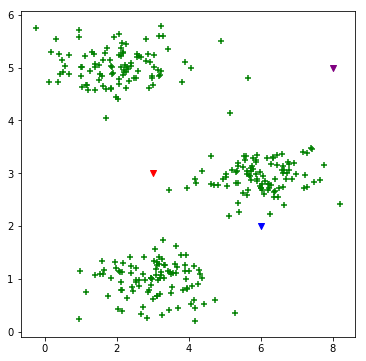

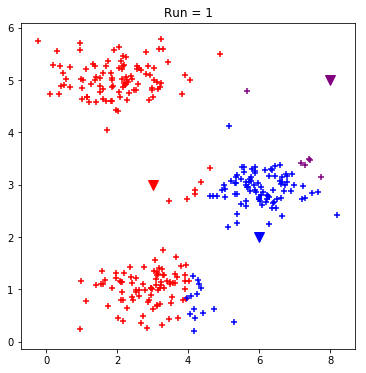

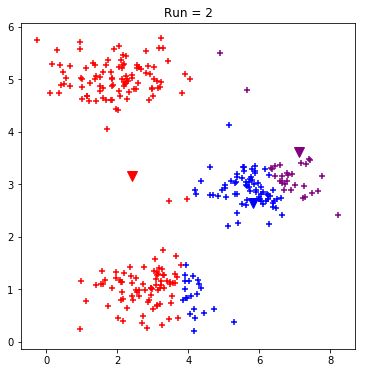

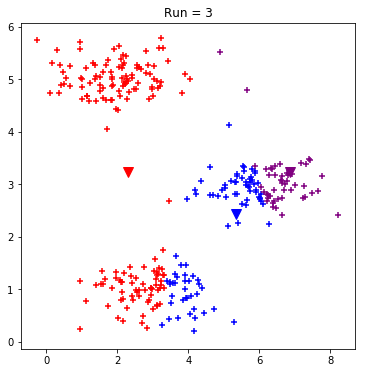

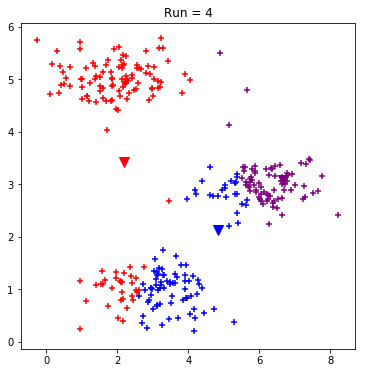

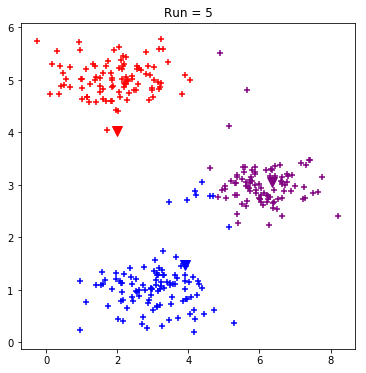

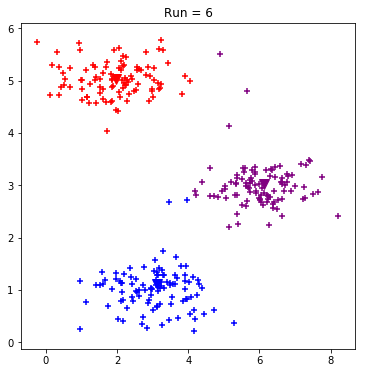

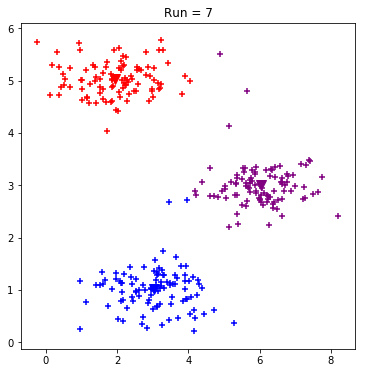

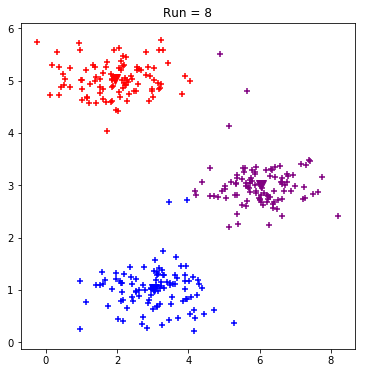

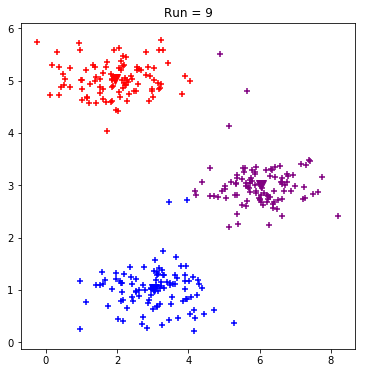

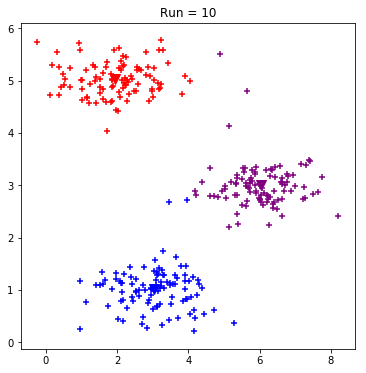

In [20]:
runkMeans(X_data2_mat, initial_centroids, 10)

In [21]:
def randomInitial(X, K):
    centroids = np.zeros(K * np.shape(X)[1])
    centroids = np.reshape(centroids, (K, np.shape(X)[1]))
    
    randidx = np.random.permutation(np.shape(X)[0])
    centroids = X[randidx[0:K], :]
    
    
    return centroids

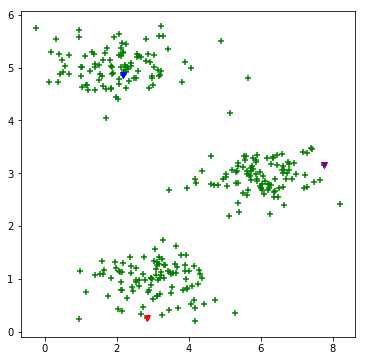

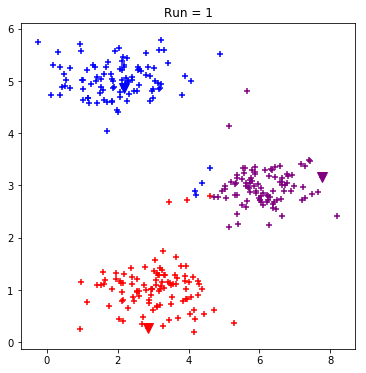

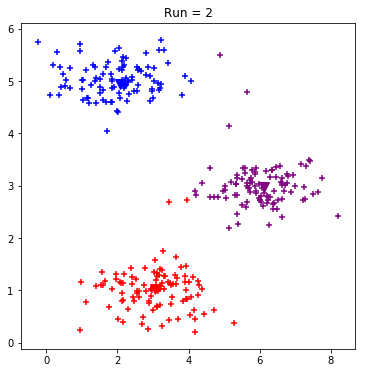

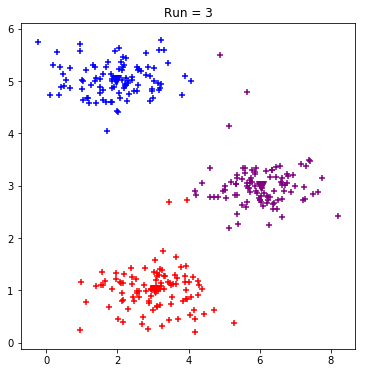

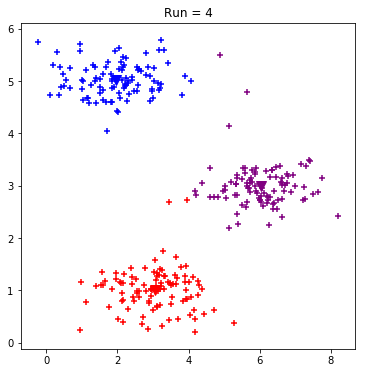

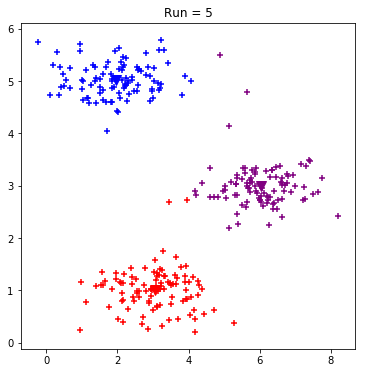

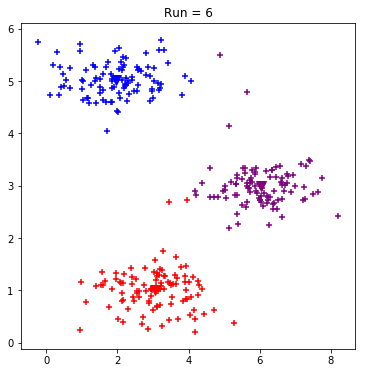

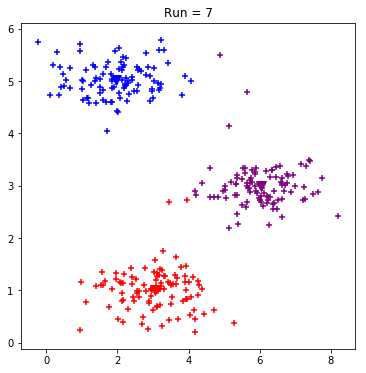

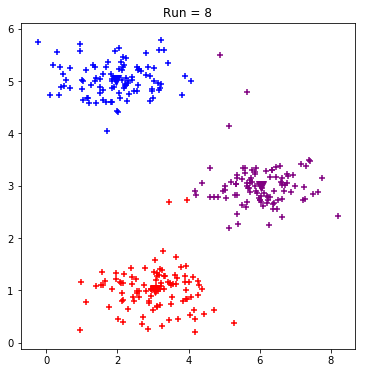

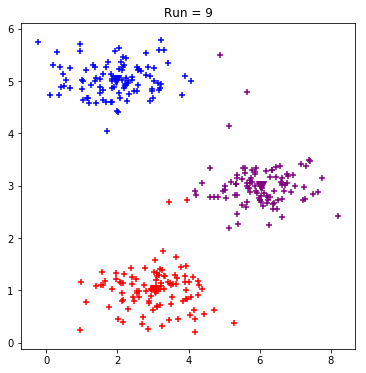

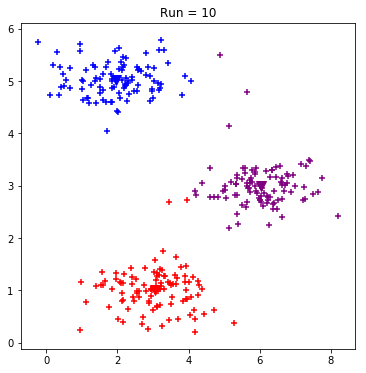

In [22]:
centroids = randomInitial(X_data2_mat, K)

runkMeans(X_data2_mat, centroids, 10)

Image compression with K-means

In [23]:
import matplotlib.image as img

In [24]:
A = img.imread("E:\\Machine Learning\\1\\bird_small.png")

img_size = np.shape(A)
X = np.reshape(A, (img_size[0] * img_size[1], 3))
X_mat = np.mat(X)

K = 16
max_iters = 10

initial_centroids = randomInitial(X_mat, K)


In [25]:
def runkMeans2(X, centroids, iterations):
    m = np.shape(X)[0]
    n = np.shape(X)[1]
    K = np.shape(centroids)[0]
    idx = np.zeros(m)
    
    for i in range(0, iterations, 1):
        idx = findClosestCentroids(X, centroids)
        centroids = np.mat(computeCentroids(X, idx, K))

        
    return centroids


In [26]:
centroids = runkMeans2(X_mat, initial_centroids, max_iters)

In [27]:
idx = findClosestCentroids(X_mat, centroids)

In [28]:
X_recovered = np.zeros(np.shape(X)[0] * np.shape(X)[1])
X_recovered = np.reshape(X_recovered, (np.shape(X)[0], np.shape(X)[1]))

for i in range(0, np.shape(X_recovered)[0], 1):
    X_recovered[i] = centroids[int(idx[i]) - 1]


X_recovered = np.reshape(X_recovered, (img_size[0], img_size[1], img_size[2]))

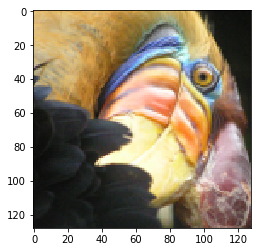

In [29]:
plt.imshow(A)

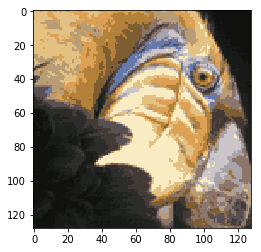

In [30]:
plt.imshow(X_recovered)

# 2. Principal Component Analysis

In this part, we will use principal component analysis (PCA) to perform dimensionality reduction.

In [31]:
data2 = mat.loadmat("E:\\Machine Learning\\1\\ex7data1.mat")

X = data2["X"]
X_mat = np.mat(X)

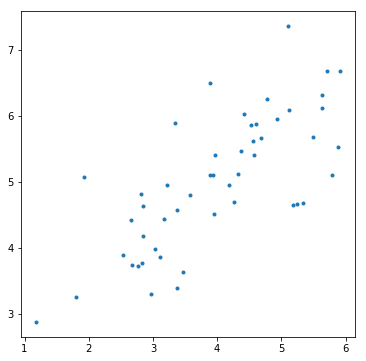

In [32]:
plt.figure(num = 1, figsize = (6, 6))

plt.scatter(np.array(X_mat[:, 0]), np.array(X_mat[:, 1]), marker = ".")

Implementing PCA

In this part, we will implement PCA. PCA consists of two computational steps: First, we compute the covariance matrix of the data. Then, we compute the eigenvectors U1, U2, ..., Un.

Before using PCA, it is important to first normalize the data by subtracting the mean value of each feature from the dataset, and scaling each dimension so that they are in the same range.

After normalizing the data, we can run PCA to compute the principal components. First, we should compute the covariance matrix of the data, 
which is given by:

COV = 1/m * transpose(X) * X

After computing the convariance matrix, we compute the principal components.

In [33]:
def featureNormalize(X):
    mu = np.array((np.mean(X[:, 0]), np.mean(X[:, 1])))
    mu_mat = np.zeros(np.shape(X)[0] * np.shape(X)[1])
    mu_mat = np.reshape(mu_mat, (np.shape(X)[0], np.shape(X)[1]))
    
    for i in range(0, np.shape(X)[0], 1):
        mu_mat[i] = mu;
    
    X_norm = X - mu_mat 
    
    
    sigma = np.array((np.std(X_norm[:, 0]), np.std(X_norm[:, 1])))
    sigma_mat = np.zeros(np.shape(X)[0] * np.shape(X)[1])
    sigma_mat = np.reshape(sigma_mat, (np.shape(X)[0], np.shape(X)[1]))
    
    for i in range(0, np.shape(X)[0], 1):
        sigma_mat[i] = sigma
    
    
    X_norm = np.multiply(X_norm, 1/sigma_mat)
    
    
    return X_norm, mu, sigma

In [34]:
X_norm = featureNormalize(X_mat)[0]
mu = featureNormalize(X_mat)[1]
sigma = featureNormalize(X_mat)[2]

In [58]:
def pca(X):
    m = np.shape(X)[0]
    n = np.shape(X)[1]
    
    U = np.zeros(n * n)
    S = np.zeros(n * n)
    U = np.reshape(U, (n, n))
    S = np.reshape(S, (n, n))
    
    sigma = 1/m * (np.transpose(X) * X)
    
    U, S, V = linalg.svd(sigma)
    
    
    return U, np.mat(S)

In [81]:
U = pca(X_norm)[0]
S = pca(X_norm)[1]

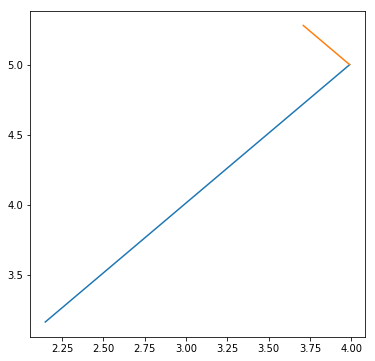

In [106]:
p1 = np.mat(mu)
p2 = mu + 1.5 * S[0, 0] * np.transpose(U[:,0])
p3 = np.mat(mu)
p4 = mu + 1.5 * S[0, 1] * np.transpose(U[:,1])

plt.figure(num = 1, figsize = (6, 6))
plt.plot(np.array((p1[0, 0], p2[0, 0])), np.array((p1[0, 1], p2[0, 1])))
plt.plot(np.array((p3[0, 0], p4[0, 0])), np.array((p3[0, 1], p4[0, 1])))


Dimension Reduction

(-4, 3)

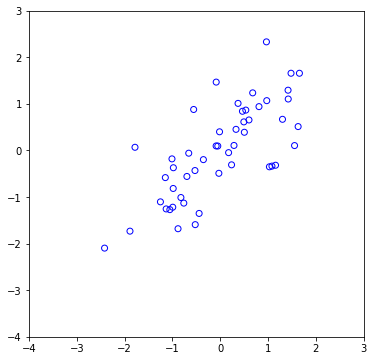

In [117]:
plt.figure(num = 1, figsize = (6, 6))

plt.scatter(np.array(X_norm[:, 0]), np.array(X_norm[:, 1]), marker = "o", c = "", edgecolors = "blue")
plt.xlim((-4, 3))
plt.ylim((-4, 3))

In [126]:
def projectData(X, U, K):
    Z = np.zeros(np.shape(X)[0] * K)
    Z = np.reshape(Z, (np.shape(X)[0], K))
    
    UReduce = U[:, 0: K]
    
    Z = X * UReduce

    
    return Z

In [127]:
K = 1

Z = projectData(X_norm, U, K)

In [135]:
def recoverData(Z, U, K):
    X_rec = np.zeros(np.shape(Z)[0] * np.shape(U)[0])
    X_rec = np.reshape(X_rec, (np.shape(Z)[0], np.shape(U)[0]))
    
    X_rec = Z * np.transpose(U[:, 0: K])
    
    
    return X_rec

In [152]:
X_rec = recoverData(Z, U, K)

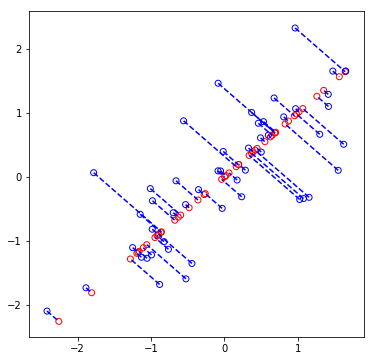

In [154]:
plt.figure(num = 1, figsize = (6, 6))

plt.scatter(np.array(X_rec[:, 0]), np.array(X_rec[:, 1]), marker = "o", c = "", edgecolors = "red")
plt.scatter(np.array(X_norm[:, 0]), np.array(X_norm[:, 1]), marker = "o", c = "", edgecolors = "blue")

for i in range(0, np.shape(X_norm)[0], 1):
    plt.plot((X_norm[i, 0], X_rec[i, 0]), (X_norm[i, 1], X_rec[i, 1]), linestyle = "--", color = "blue")
    

The projection effectively only retains the information in the direction given by U1.

Face Image Dataset

In [155]:
faces = mat.loadmat("E:\\Machine Learning\\1\\ex7faces.mat")

In [162]:
X = faces["X"]

X_mat = np.mat(X)

In [329]:
def displayData(X):
#     random_indices = np.random.permutation(np.shape(X)[0])
    X_matrix_plot = X
    
    rows = np.shape(X_matrix_plot)[0]
    cols = np.shape(X_matrix_plot)[1]
    
    example_width = int(cols ** 0.5)
    example_height = int(cols / example_width)
    
    display_rows = int(np.floor(rows ** 0.5))
    display_cols = int(np.ceil(rows / display_rows))
    
    pad = 1
    
    display_array = -np.ones((pad + display_rows * (example_height + pad), pad + display_cols * (example_width + pad)))
    
    curr_ex = 0
    for j in range(0, display_rows, 1):
        for i in range(0, display_cols, 1):
            max_val = np.max(abs(X_matrix_plot[curr_ex, :]))
            display_array[pad + j * (example_height + pad): pad + j * (example_height + pad) + example_height, \
                pad + i * (example_width + pad): pad + i * (example_width + pad) + example_width] = \
                np.reshape(X_matrix_plot[curr_ex, :], (example_height, example_width)) / max_val
        
            curr_ex = curr_ex + 1
            
    
    return display_array

In [334]:
X_faces = X_mat[0:100, :]

display_array = displayData(X_faces)

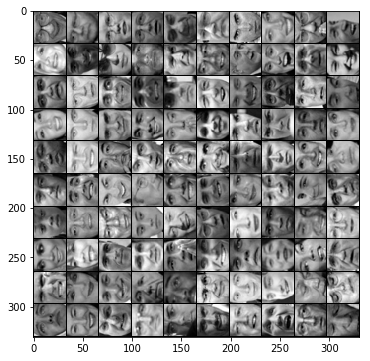

In [335]:
plt.figure(num = 1, figsize = (6, 6))

plt.imshow(display_array, cmap = "gray")

In [411]:
def featureNormalizeFaces(X):
    mu = []
    for i in range(0, np.shape(X)[1], 1):
        mu.append(np.mean(X[:, i]))
    
    mu = np.mat(mu)
    
    mu_mat = np.zeros((np.shape(X)[0], np.shape(X)[1]))  
    for i in range(0, np.shape(X)[0], 1):
        mu_mat[i] = mu

    X_norm = X - mu_mat 
    
    
    sigma = []
    for i in range(0, np.shape(X)[1], 1):
        sigma.append(np.std(X_norm[:, i]))
        
    sigma = np.mat(sigma)
        
    sigma_mat = np.zeros((np.shape(X)[0], np.shape(X)[1]))
    for i in range(0, np.shape(X)[0], 1):
        sigma_mat[i] = sigma
    
    
    X_norm = np.multiply(X_norm, 1/sigma_mat)

    
    return X_norm, mu, sigma

In [412]:
X_norm_faces = featureNormalizeFaces(X_faces)[0]
mu = featureNormalizeFaces(X_faces)[1]
sigma = featureNormalizeFaces(X_faces)[2]

In [413]:
def pca(X):
    m = np.shape(X)[0]
    n = np.shape(X)[1]
    
    U = np.zeros((n, n))
    S = np.zeros((n, n))
    
    sigma = 1/m * (np.transpose(X) * X)
    
    U, S, V = linalg.svd(sigma)
    
    
    return U, np.mat(S)

In [417]:
U_faces = pca(X_norm_faces)[0]
S_faces = pca(X_norm_faces)[1]

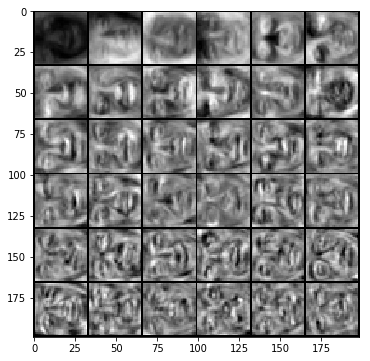

In [432]:
display_faces_1 = displayData(np.transpose(U_faces[:, 0:36]))

plt.figure(num = 1, figsize = (6, 6))
plt.imshow(display_faces_1, cmap = "gray")

In [424]:
def projectData(X, U, K):
    Z = np.zeros(np.shape(X)[0] * K)
    Z = np.reshape(Z, (np.shape(X)[0], K))
    
    UReduce = U[:, 0: K]
    
    Z = X * UReduce

    
    return Z

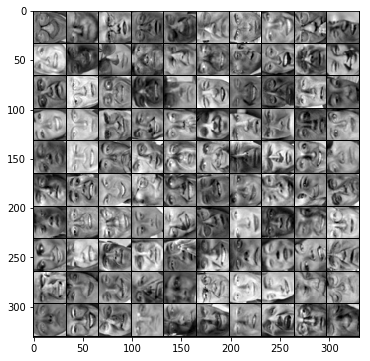

In [437]:
K = 100

Z_faces = projectData(X_norm_faces, U_faces, K)
X_rec_faces = recoverData(Z_faces, U_faces, K)

display_norm = displayData(X_norm_faces[0:100, :])
display_rec = displayData(X_rec_faces[0:100, :])

plt.figure(figsize = (6, 6))
plt.imshow(display_norm, cmap = "gray")

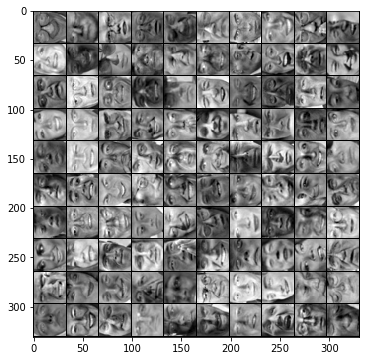

In [439]:
plt.figure(figsize = (6, 6))

plt.imshow(display_rec, cmap = "gray")